In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import csv

Data Sources:

##### https://www.basketball-reference.com/leagues/NBA_2002_totals.html\n
##### https://www.basketball-reference.com/leagues/NBA_2012_totals.html\n
##### https://www.basketball-reference.com/leagues/NBA_2022_totals.html\n

In [2]:
datasets = ['raw_data/nba_01_02.csv', 'raw_data/nba_11_12.csv', 'raw_data/nba_21_22.csv']

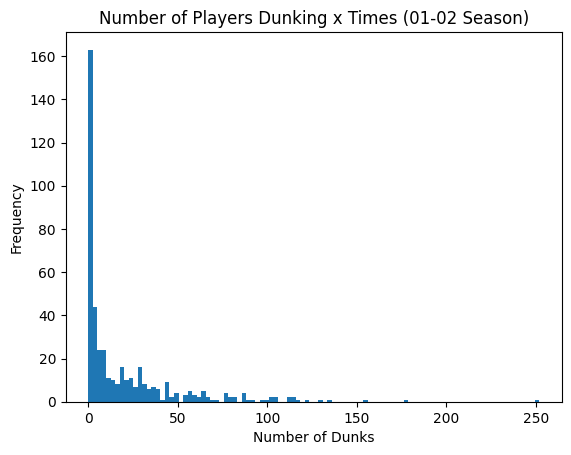

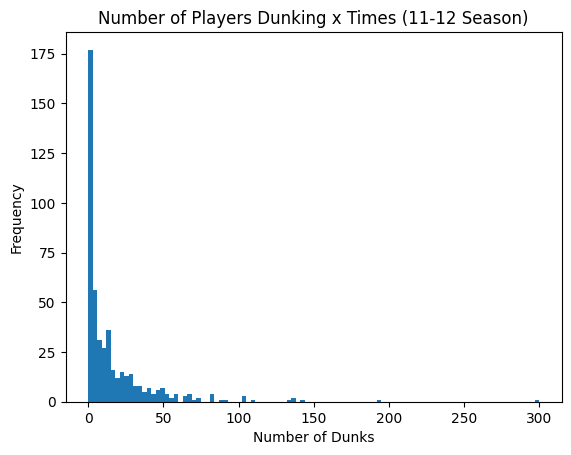

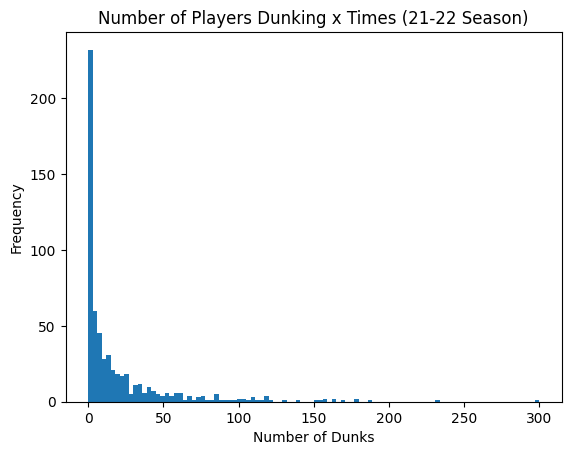

In [5]:
for csv_path in datasets:
    nba_df = pd.read_csv(csv_path)
    nba_df = nba_df[['Player', 'MP', '#']].rename(columns={'#': 'Dunks'})
    nba_df = nba_df.groupby(['Player']).agg({'MP': 'sum', 'Dunks': 'sum'}).reset_index()

    # CREATE DISAGGREGATE CSV FILES
    disagg_csv_data = nba_df.to_dict('records')
    disagg_field_names = ['Player', 'MP', 'Dunks']
    
    with open(f'processed_data/disagg_nba_dunk_{csv_path[13:15]}_{csv_path[16:18]}.csv', 'w') as disagg_csvfile:
        writer = csv.DictWriter(disagg_csvfile, fieldnames=disagg_field_names)
        writer.writeheader()
        writer.writerows(disagg_csv_data)

    # GENERATE AGGREGATE HISTOGRAMS
    plt.hist(nba_df['Dunks'], bins=100)
    plt.title(f'Number of Players Dunking x Times ({csv_path[13:15]}-{csv_path[16:18]} Season)')
    plt.xlabel('Number of Dunks')
    plt.ylabel('Frequency')
    plt.show()

    # CREATE AGGREGATE CSV FILES
    num_dunks = nba_df['Dunks'].tolist()
    hist_data = dict(sorted(dict(Counter(num_dunks)).items()))

    for d in range(max(hist_data)+1):
        if d not in hist_data:
            hist_data[d] = 0

    agg_field_names = ['Num_Dunks', 'Freq']

    hist_data = dict(sorted(hist_data.items()))
    agg_csv_data = [{'Num_Dunks' : x, 'Freq' : f} for x, f in hist_data.items()]

    with open(f'processed_data/agg_nba_dunk_{csv_path[13:15]}_{csv_path[16:18]}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=agg_field_names)
        writer.writeheader()
        writer.writerows(agg_csv_data)